<a href="https://colab.research.google.com/github/Shivam-Verma1/NLP-lab-Assignments/blob/main/ShivamVerma102103252_NLP2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

# Scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    # Sends a GET request to the specified URL and returns a Response object.
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find_all('p')]
    print(url)
    return text

# URLs of transcripts in scope
urls = [
    'https://scrapsfromtheloft.com/history/who-killed-alexander-the-great/',
    'https://scrapsfromtheloft.com/history/napoleon-corsican-eagle-flown-into-legend/',
    'https://scrapsfromtheloft.com/history/eye-witness-iran-hostage-crisis-tehran-4-november-1979/'
]

# history title names
history = ['Who Killed Alexander The Great','Napeleon A Corsican Eagle Flown into Legend','Eye Witness to Iran Hostage Crisis Tehran 4 Nov,1979']

In [3]:
# # Actually request transcripts (takes a few minutes to run)
transcripts = [url_to_transcript(u) for u in urls]

https://scrapsfromtheloft.com/history/who-killed-alexander-the-great/
https://scrapsfromtheloft.com/history/napoleon-corsican-eagle-flown-into-legend/
https://scrapsfromtheloft.com/history/eye-witness-iran-hostage-crisis-tehran-4-november-1979/


In [4]:
type(transcripts)

list

### Now Let's Make Pickle Directory for Later Use

picke.dump() - Serializes an object hierarchy into a byte stream and saves it to a file.

pickle.load() - Deserializes a byte stream from a file and reconstructs the Python objects hierarchy.

In [5]:
# # Pickle files for later use
# Make a new directory to hold the text files
!mkdir transcripts
for i, c in enumerate(history):
    with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

In [6]:
# Load pickled files
data = {}
for i, c in enumerate(history):
    # print(i,c)
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [7]:
# data
type(data)

dict

In [8]:
# Double check to make sure data has been loaded properly
data.keys()

dict_keys(['Who Killed Alexander The Great', 'Napeleon A Corsican Eagle Flown into Legend', 'Eye Witness to Iran Hostage Crisis Tehran 4 Nov,1979'])

In [9]:
# More checks
data['Who Killed Alexander The Great'][:2]

['In his article, James Romm explores the enduring mystery surrounding the death of Alexander the Great in 323 BC, an event that has baffled historians and sparked numerous theories over the centuries. Despite his robust health and seemingly divine status, Alexander’s sudden death at 32 in Babylon shocked his empire and left a void of leadership, plunging the region into a tumultuous period known as the Wars of the Successors. While some historians suggest natural causes like disease, others propose theories of murder, fueled by the suspicious circumstances and political intrigue surrounding his death. Oliver Stone’s film Alexander reignited interest in these theories, suggesting a conspiracy among Alexander’s generals. Various hypotheses range from poisoning by rivals or discontented officers to accidental overdose by his own physicians. Despite extensive historical, forensic, and toxicological research, including novel approaches that match ancient toxins with Alexander’s symptoms, t

## Data Cleaning

In [10]:
a=iter(data.keys())

In [11]:
# Let's take a look at our data again
# print(next(a))
# print(next(a))
# print(next(a))

In [12]:
# Notice that our dictionary is currently in key: history, value: string format of text uploaded
next(iter(data.values()))

['In his article, James Romm explores the enduring mystery surrounding the death of Alexander the Great in 323 BC, an event that has baffled historians and sparked numerous theories over the centuries. Despite his robust health and seemingly divine status, Alexander’s sudden death at 32 in Babylon shocked his empire and left a void of leadership, plunging the region into a tumultuous period known as the Wars of the Successors. While some historians suggest natural causes like disease, others propose theories of murder, fueled by the suspicious circumstances and political intrigue surrounding his death. Oliver Stone’s film Alexander reignited interest in these theories, suggesting a conspiracy among Alexander’s generals. Various hypotheses range from poisoning by rivals or discontented officers to accidental overdose by his own physicians. Despite extensive historical, forensic, and toxicological research, including novel approaches that match ancient toxins with Alexander’s symptoms, t

In [13]:
# We are going to change this to key: history , value: String Format
# Basically to remove the spaces present in the text
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

In [14]:
data['Eye Witness to Iran Hostage Crisis Tehran 4 Nov,1979']

['by Jonathan O’Callaghan',
 'In 1979, Mark Lijek was working at the US Embassy in Tehran as a consular officer along with his wife, a consular assistant. On 4 November 1979, the embassy was stormed by Iranian protestors, forcing Lijek, his wife and four others to seek refuge across the city as they awaited a daring rescue by Canada and the CIA.',
 'At 9am on Sunday 4 November 1979, Mark Lijek and his colleagues sat in shocked horror as hundreds of Iranian protestors climbed the gate of the US Embassy in Tehran. The attack was the embodiment of months of increased tension between Iran and the US, culminating in what would be one of the modern era’s highest-profile hostage crises. As the embassy fell into Iranian hands, however, Lijek and five others, including his wife, would become part of a remarkable escape plan to get out of the country. Their incredible story was retold in the Oscar-winning 2012 film Argo, but here Lijek tells us what really happened.',
 'Lijek served as a consula

In [15]:
# Combine it!
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [16]:
data_combined['Eye Witness to Iran Hostage Crisis Tehran 4 Nov,1979']

['by Jonathan O’Callaghan In 1979, Mark Lijek was working at the US Embassy in Tehran as a consular officer along with his wife, a consular assistant. On 4 November 1979, the embassy was stormed by Iranian protestors, forcing Lijek, his wife and four others to seek refuge across the city as they awaited a daring rescue by Canada and the CIA. At 9am on Sunday 4 November 1979, Mark Lijek and his colleagues sat in shocked horror as hundreds of Iranian protestors climbed the gate of the US Embassy in Tehran. The attack was the embodiment of months of increased tension between Iran and the US, culminating in what would be one of the modern era’s highest-profile hostage crises. As the embassy fell into Iranian hands, however, Lijek and five others, including his wife, would become part of a remarkable escape plan to get out of the country. Their incredible story was retold in the Oscar-winning 2012 film Argo, but here Lijek tells us what really happened. Lijek served as a consular officer fo

In [17]:
# We can either keep it in dictionary format or put it into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
"Eye Witness to Iran Hostage Crisis Tehran 4 Nov,1979","by Jonathan O’Callaghan In 1979, Mark Lijek was working at the US Embassy in Tehran as a consular officer along with his wife, a consular assistan..."
Napeleon A Corsican Eagle Flown into Legend,The irresistible rise and rapid fall of the man who shook Europe in less than twenty years by Mario Galloni From an artillery officer to a general...
Who Killed Alexander The Great,"In his article, James Romm explores the enduring mystery surrounding the death of Alexander the Great in 323 BC, an event that has baffled histori..."


In [18]:
data_df.transcript.loc['Eye Witness to Iran Hostage Crisis Tehran 4 Nov,1979']

'by Jonathan O’Callaghan In 1979, Mark Lijek was working at the US Embassy in Tehran as a consular officer along with his wife, a consular assistant. On 4 November 1979, the embassy was stormed by Iranian protestors, forcing Lijek, his wife and four others to seek refuge across the city as they awaited a daring rescue by Canada and the CIA. At 9am on Sunday 4 November 1979, Mark Lijek and his colleagues sat in shocked horror as hundreds of Iranian protestors climbed the gate of the US Embassy in Tehran. The attack was the embodiment of months of increased tension between Iran and the US, culminating in what would be one of the modern era’s highest-profile hostage crises. As the embassy fell into Iranian hands, however, Lijek and five others, including his wife, would become part of a remarkable escape plan to get out of the country. Their incredible story was retold in the Oscar-winning 2012 film Argo, but here Lijek tells us what really happened. Lijek served as a consular officer for

In [19]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [20]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_df.transcript.apply(round1))
data_clean

,transcript
"Eye Witness to Iran Hostage Crisis Tehran 4 Nov,1979",by jonathan o’callaghan in mark lijek was working at the us embassy in tehran as a consular officer along with his wife a consular assistant on ...
Napeleon A Corsican Eagle Flown into Legend,the irresistible rise and rapid fall of the man who shook europe in less than twenty years by mario galloni from an artillery officer to a general...
Who Killed Alexander The Great,in his article james romm explores the enduring mystery surrounding the death of alexander the great in bc an event that has baffled historians a...


In [21]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [22]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
data_clean

,transcript
"Eye Witness to Iran Hostage Crisis Tehran 4 Nov,1979",by jonathan ocallaghan in mark lijek was working at the us embassy in tehran as a consular officer along with his wife a consular assistant on n...
Napeleon A Corsican Eagle Flown into Legend,the irresistible rise and rapid fall of the man who shook europe in less than twenty years by mario galloni from an artillery officer to a general...
Who Killed Alexander The Great,in his article james romm explores the enduring mystery surrounding the death of alexander the great in bc an event that has baffled historians a...


## For Named entity recognition (NER):
### To basically detect all the names
### Uses spaCy to identify named entities (persons, organizations, locations)

In [23]:
import spacy

# Load the English language model for spaCy
nlp = spacy.load("en_core_web_sm")

def identify_entities(text):
  doc = nlp(text)
  entities = [f"{ent.text} ({ent.label_})" for ent in doc.ents]
  return entities

data_cleaned = {key: [identify_entities(clean_text_round2(round1(combine_text(value))))] for (key, value) in data.items()}
data_cleaned


{'Who Killed Alexander The Great': [['james romm (PERSON)',
   'the centuries (DATE)',
   'james romm (PERSON)',
   'june (DATE)',
   'albania (GPE)',
   'pakistan (GPE)',
   'today (DATE)',
   'one (CARDINAL)',
   'asia (LOC)',
   'south asian (NORP)',
   'one (CARDINAL)',
   'iran (GPE)',
   'the king fell gravely ill (ORG)',
   'two years later (DATE)',
   'halfcentury (CARDINAL)',
   'today (DATE)',
   'macedon (PERSON)',
   'the university of maryland (ORG)',
   'some months earlier (DATE)',
   'two (CARDINAL)',
   'first (ORDINAL)',
   'anthony hopkins (PERSON)',
   'decades (DATE)',
   'india (GPE)',
   'army (ORG)',
   'the university of california berkeley (ORG)',
   'arrian (NORP)',
   'two (CARDINAL)',
   'greek (NORP)',
   'last days (DATE)',
   'australian (NORP)',
   'brian bosworth (PERSON)',
   'arrian (NORP)',
   'arrian (NORP)',
   'two (CARDINAL)',
   'arrian (NORP)',
   'one (CARDINAL)',
   'the next day (DATE)',
   'first (ORDINAL)',
   'arrian (NORP)',
   'one (CA

### Remove Citations| from the text
#### Removes some generalized citations from the text

In [24]:
import re

def remove_citations(text):

  # General Citation patterns
  citation_patterns = [
    r"\(.*?\)\s*\[[0-9]+\]",   # Parentheses and bracketed numbers (e.g., "(Author, 2023) [1]")
    r"\[[0-9]+, [0-9]+\]",      # Bracketed numbers with comma (e.g., "[1, 2]")
    r"\[[0-9]+\]",             # Bracketed numbers alone (e.g., "[3]")
    r"\([^)]*\s*—\s*[0-9]+\)",   # Parentheses with em dash and number (e.g., "(Author — 2023)")
  ]

  for pattern in citation_patterns:
    text = re.sub(pattern, "", text, flags=re.IGNORECASE)  # Case-insensitive matching

  return text

data_cleaned = {key: [remove_citations(clean_text_round2(round1(combine_text(value))))] for (key, value) in data.items()}


# Organizing the Data

### Assignment:
1. Organized data in two standard text formats:
   a) Corpus - corpus is a collection of texts, and they are all put together neatly in a pandas dataframe here.
   b) Document-Term Matrix - word counts in matrix format

In [25]:
# Let's take a look at our dataframe
data_df

,transcript
"Eye Witness to Iran Hostage Crisis Tehran 4 Nov,1979","by Jonathan O’Callaghan In 1979, Mark Lijek was working at the US Embassy in Tehran as a consular officer along with his wife, a consular assistan..."
Napeleon A Corsican Eagle Flown into Legend,The irresistible rise and rapid fall of the man who shook Europe in less than twenty years by Mario Galloni From an artillery officer to a general...
Who Killed Alexander The Great,"In his article, James Romm explores the enduring mystery surrounding the death of Alexander the Great in 323 BC, an event that has baffled histori..."


In [26]:
# Let's add the author full names as well
full_names = ['Jonathan O’Callaghan','Anthony','Richard Wills']

data_df['Author'] = full_names
data_df

,transcript,Author
"Eye Witness to Iran Hostage Crisis Tehran 4 Nov,1979","by Jonathan O’Callaghan In 1979, Mark Lijek was working at the US Embassy in Tehran as a consular officer along with his wife, a consular assistan...",Jonathan O’Callaghan
Napeleon A Corsican Eagle Flown into Legend,The irresistible rise and rapid fall of the man who shook Europe in less than twenty years by Mario Galloni From an artillery officer to a general...,Anthony
Who Killed Alexander The Great,"In his article, James Romm explores the enduring mystery surrounding the death of Alexander the Great in 323 BC, an event that has baffled histori...",Richard Wills


In [27]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

## Document Term Matrix

## Also used additional parameters of CountVectorizer like ngram_range ,min_df, max_df etc.

In [28]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english',ngram_range=(1,2))   # means unigrams and bigrams
print(cv)
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = data_clean.index
data_dtm

CountVectorizer(ngram_range=(1, 2), stop_words='english')


,abandoned,abandoned reveals,abdicare,abdicare dopo,abdicare porre,abdicate,abdicate attempted,abdicate place,abdication,abdication alienated,...,zar,zar alessandro,zealand,zealand toxicologist,zone,zone expected,zoppicante,zoppicante napoleone,zurich,zurich morning
"Eye Witness to Iran Hostage Crisis Tehran 4 Nov,1979",1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,1
Napeleon A Corsican Eagle Flown into Legend,0,0,2,1,1,2,1,1,1,1,...,3,3,0,0,0,0,1,1,0,0
Who Killed Alexander The Great,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [29]:
data_cv

<3x9498 sparse matrix of type '<class 'numpy.int64'>'
	with 9918 stored elements in Compressed Sparse Row format>

In [30]:
# Let's pickle it for later use
data_dtm.to_pickle("dtm.pkl")

In [31]:
# Let's also pickle the cleaned data (before we put it in document-term matrix format) and the CountVectorizer object
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

In [32]:
data_dtm

,abandoned,abandoned reveals,abdicare,abdicare dopo,abdicare porre,abdicate,abdicate attempted,abdicate place,abdication,abdication alienated,...,zar,zar alessandro,zealand,zealand toxicologist,zone,zone expected,zoppicante,zoppicante napoleone,zurich,zurich morning
"Eye Witness to Iran Hostage Crisis Tehran 4 Nov,1979",1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,1
Napeleon A Corsican Eagle Flown into Legend,0,0,2,1,1,2,1,1,1,1,...,3,3,0,0,0,0,1,1,0,0
Who Killed Alexander The Great,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [33]:
data_dtm.to_csv('ShivamNLPData.csv')

In [34]:
data_clean.transcript



Eye Witness to Iran Hostage Crisis Tehran 4 Nov,1979    by jonathan ocallaghan in  mark lijek was working at the us embassy in tehran as a consular officer along with his wife a consular assistant on  n...
Napeleon A Corsican Eagle Flown into Legend             the irresistible rise and rapid fall of the man who shook europe in less than twenty years by mario galloni from an artillery officer to a general...
Who Killed Alexander The Great                          in his article james romm explores the enduring mystery surrounding the death of alexander the great in  bc an event that has baffled historians a...
Name: transcript, dtype: object

------------------

# Assignment 3


-----


In [35]:
data_dtm

,abandoned,abandoned reveals,abdicare,abdicare dopo,abdicare porre,abdicate,abdicate attempted,abdicate place,abdication,abdication alienated,...,zar,zar alessandro,zealand,zealand toxicologist,zone,zone expected,zoppicante,zoppicante napoleone,zurich,zurich morning
"Eye Witness to Iran Hostage Crisis Tehran 4 Nov,1979",1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,1
Napeleon A Corsican Eagle Flown into Legend,0,0,2,1,1,2,1,1,1,1,...,3,3,0,0,0,0,1,1,0,0
Who Killed Alexander The Great,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


{'abandoned': 1, 'abandoned reveals': 1, 'abdicare': 2, 'abdicare dopo': 1, 'abdicare porre': 1, 'abdicate': 2, 'abdicate attempted': 1, 'abdicate place': 1, 'abdication': 1, 'abdication alienated': 1, 'abdicazione': 1, 'abdicazione si': 1, 'ability': 1, 'ability revitalize': 1, 'able': 3, 'able evade': 1, 'able relax': 1, 'able stupefy': 1, 'absolutely': 1, 'absolutely supporters': 1, 'absolutism': 1, 'absolutism creating': 1, 'absurd': 1, 'absurd distinguished': 1, 'accentramento': 1, 'accentramento amministrativo': 1, 'access': 2, 'access strychnine': 1, 'access unfamiliar': 1, 'accident': 2, 'accident atkinson': 1, 'accident powdered': 1, 'accidental': 1, 'accidental overdose': 1, 'accidentally': 1, 'accidentally overdosed': 1, 'accomplished': 1, 'accomplished masterpiece': 1, 'accorda': 1, 'accorda il': 1, 'according': 4, 'according ancient': 1, 'according plan': 1, 'according revolutionary': 1, 'according ridley': 1, 'account': 4, 'account alexanders': 1, 'account antipater': 1, 

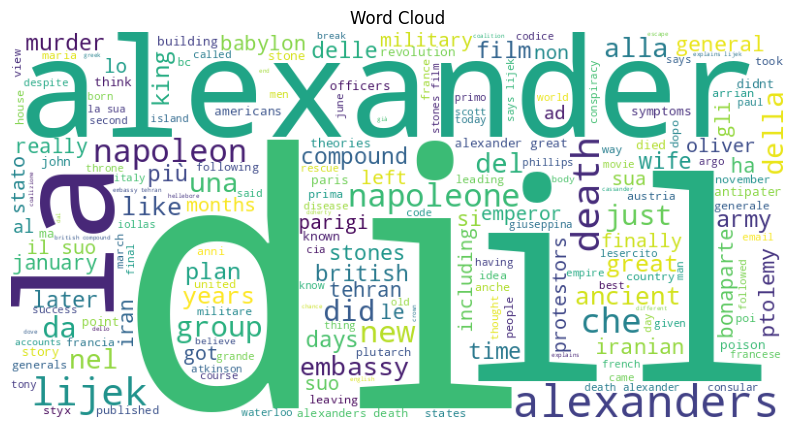

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


word_frequencies = data_dtm.sum().to_dict()
print(word_frequencies)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.title('Word Cloud')
plt.axis('off')
plt.show()

In [58]:
data_dtm

,abandoned,abandoned reveals,abdicare,abdicare dopo,abdicare porre,abdicate,abdicate attempted,abdicate place,abdication,abdication alienated,...,zar,zar alessandro,zealand,zealand toxicologist,zone,zone expected,zoppicante,zoppicante napoleone,zurich,zurich morning
"Eye Witness to Iran Hostage Crisis Tehran 4 Nov,1979",1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,1
Napeleon A Corsican Eagle Flown into Legend,0,0,2,1,1,2,1,1,1,1,...,3,3,0,0,0,0,1,1,0,0
Who Killed Alexander The Great,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [59]:
col_sum=data_dtm.sum()
print(col_sum)
top_words=col_sum.nlargest(50)

abandoned               1
abandoned reveals       1
abdicare                2
abdicare dopo           1
abdicare porre          1
                       ..
zone expected           1
zoppicante              1
zoppicante napoleone    1
zurich                  1
zurich morning          1
Length: 9498, dtype: int64


In [38]:
top_words

di            90
il            83
alexander     63
la            61
alexanders    45
death         33
lijek         33
che           25
napoleon      22
napoleone     22
new           21
da            19
did           19
group         19
della         18
just          18
alla          17
del           17
nel           17
una           17
embassy       16
ancient       15
like          15
great         14
years         14
army          13
film          13
king          13
plan          13
british       12
compound      12
days          12
delle         12
later         12
murder        12
più           12
time          12
wife          12
general       11
iranian       11
ptolemy       11
si            11
stones        11
babylon       10
bonaparte     10
gli           10
ha            10
iran          10
january       10
le            10
dtype: int64

In [39]:
##Top 30 words from each book

In [57]:
top30=[]
for book, row in data_dtm.iterrows():
    print(f"{book}:")
    a=row.sort_values(ascending=False).head(30)
    print(a)
    top30.append(a)
    print("\n")

Eye Witness to Iran Hostage Crisis Tehran 4 Nov,1979:
lijek         33
group         19
embassy       16
plan          12
compound      12
iranian       11
tehran        10
iran           9
just           9
protestors     9
did            8
like           8
americans      8
january        7
house          7
didnt          7
wife           7
got            7
really         7
building       7
came           6
movie          6
tony           6
rescue         6
consular       6
time           6
says lijek     6
says           6
november       6
argo           6
Name: Eye Witness to Iran Hostage Crisis Tehran 4 Nov,1979, dtype: int64


Napeleon A Corsican Eagle Flown into Legend:
di           90
il           83
la           61
che          25
napoleon     22
napoleone    22
da           19
della        18
nel          17
del          17
alla         17
una          17
più          12
delle        12
army         11
si           11
le           10
ha           10
years        10
gli         

In [55]:
top30

[lijek         33
 group         19
 embassy       16
 plan          12
 compound      12
 iranian       11
 tehran        10
 iran           9
 just           9
 protestors     9
 did            8
 like           8
 americans      8
 january        7
 house          7
 didnt          7
 wife           7
 got            7
 really         7
 building       7
 came           6
 movie          6
 tony           6
 rescue         6
 consular       6
 time           6
 says lijek     6
 says           6
 november       6
 argo           6
 Name: Eye Witness to Iran Hostage Crisis Tehran 4 Nov,1979, dtype: int64,
 di           90
 il           83
 la           61
 che          25
 napoleon     22
 napoleone    22
 da           19
 della        18
 nel          17
 del          17
 alla         17
 una          17
 più          12
 delle        12
 army         11
 si           11
 le           10
 ha           10
 years        10
 gli          10
 bonaparte    10
 il suo        9
 emperor   

In [41]:
##Words used in all 3 books

In [42]:
common_words=[]
for word in data_dtm.columns:
  if((data_dtm[word]!=0).all()):
    common_words.append(word)

In [43]:
print('The total number of words used in all three books : ',len(common_words))
print(common_words)

The total number of words used in all three books :  73
['according', 'address', 'address published', 'articles', 'articles week', 'assume', 'attention', 'best', 'best articles', 'british', 'choice', 'day', 'days', 'did', 'directly', 'directly inbox', 'email', 'email address', 'email website', 'end', 'eventually', 'fields', 'fields marked', 'film', 'final', 'finally', 'followed', 'following', 'general', 'hands', 'having', 'history', 'home', 'inbox', 'including', 'john', 'just', 'known', 'later', 'leading', 'loft', 'loft rights', 'man', 'march', 'marked', 'marked email', 'member', 'modern', 'months', 'new', 'people', 'power', 'prime', 'published', 'published required', 'required', 'required fields', 'reserved', 'reserved best', 'right', 'rights', 'rights reserved', 'scraps', 'scraps loft', 'second', 'success', 'thanks', 'time', 'website', 'week', 'week directly', 'wife', 'work']


abandoned               1
abandoned reveals       1
abdicare                0
abdicare dopo           0
abdicare porre          0
                       ..
zone expected           1
zoppicante              0
zoppicante napoleone    0
zurich                  1
zurich morning          1
Name: Eye Witness to Iran Hostage Crisis Tehran 4 Nov,1979, Length: 9498, dtype: int64


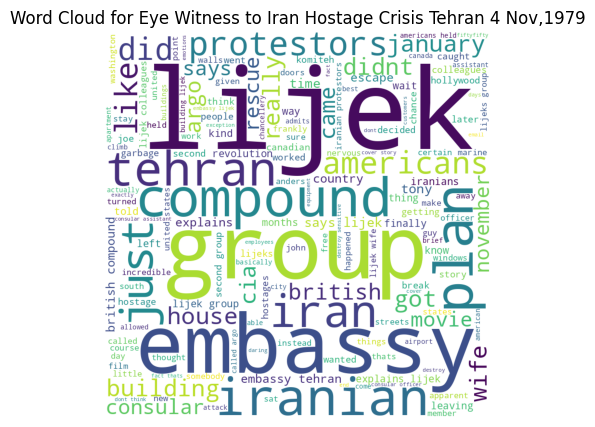

abandoned               0
abandoned reveals       0
abdicare                2
abdicare dopo           1
abdicare porre          1
                       ..
zone expected           0
zoppicante              1
zoppicante napoleone    1
zurich                  0
zurich morning          0
Name: Napeleon A Corsican Eagle Flown into Legend, Length: 9498, dtype: int64


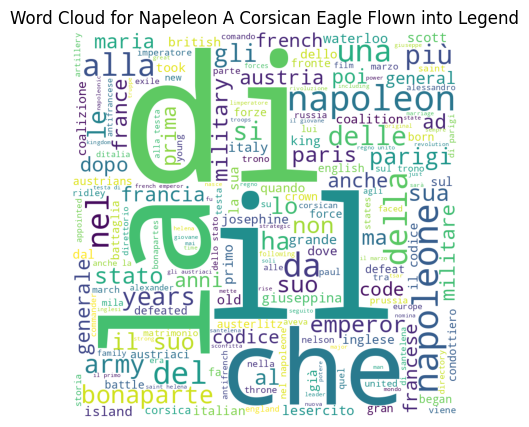

abandoned               0
abandoned reveals       0
abdicare                0
abdicare dopo           0
abdicare porre          0
                       ..
zone expected           0
zoppicante              0
zoppicante napoleone    0
zurich                  0
zurich morning          0
Name: Who Killed Alexander The Great, Length: 9498, dtype: int64


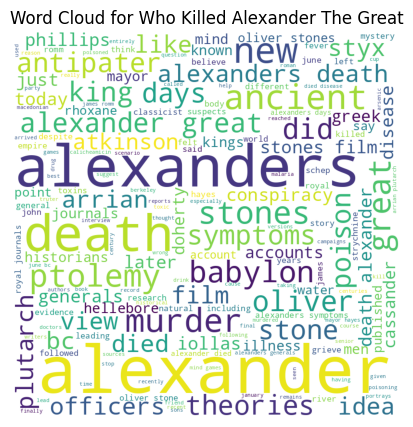

In [60]:
def plot_word_cloud(book_name, word_freq):
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(word_freq)


    plt.figure(figsize = (8, 5))
    plt.imshow(wordcloud)
    plt.axis("off")

    plt.title(f'Word Cloud for {book_name}')
    plt.show()


for book_name, word_freq in data_dtm.iterrows():
    print(word_freq)
    plot_word_cloud(book_name, word_freq)

In [45]:
unique_words = data_dtm.astype(bool).sum(axis=1)

unique_word_df = pd.DataFrame({'Unique_Word_Count': unique_words})
print(unique_word_df)
print('\nAverage words per book is : ',unique_word_df.sum()/3)

                                                      Unique_Word_Count
Eye Witness to Iran Hostage Crisis Tehran 4 Nov,1979               1948
Napeleon A Corsican Eagle Flown into Legend                        4773
Who Killed Alexander The Great                                     3197

Average words per book is :  Unique_Word_Count    3306.0
dtype: float64


Findings
1. Average number of unique words used is 3306.
2. Complete works of Napeleon A Corsican Eagle Flown into Legend has the most number of unique words.
3. Eye Witness to Iran Hostage Crisis Tehran 4 Nov,1979  has least number of unique words
4. 73 words are common in all 3 books.


In [46]:
single_transcript = [item for sublist in transcripts for item in sublist]


In [47]:
single_string = ' '.join(single_transcript)

print(single_string)

In his article, James Romm explores the enduring mystery surrounding the death of Alexander the Great in 323 BC, an event that has baffled historians and sparked numerous theories over the centuries. Despite his robust health and seemingly divine status, Alexander’s sudden death at 32 in Babylon shocked his empire and left a void of leadership, plunging the region into a tumultuous period known as the Wars of the Successors. While some historians suggest natural causes like disease, others propose theories of murder, fueled by the suspicious circumstances and political intrigue surrounding his death. Oliver Stone’s film Alexander reignited interest in these theories, suggesting a conspiracy among Alexander’s generals. Various hypotheses range from poisoning by rivals or discontented officers to accidental overdose by his own physicians. Despite extensive historical, forensic, and toxicological research, including novel approaches that match ancient toxins with Alexander’s symptoms, the

In [48]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [49]:
import spacy

nlp = spacy.load("en_core_web_lg")


text = single_string
doc = nlp(text)

entities_dict = {}

for entity in doc.ents:
    entities_dict[entity.text] = entity.label_

print(entities_dict)

{'James Romm': 'PERSON', 'Alexander the Great': 'PERSON', 'the centuries': 'DATE', 'Alexander': 'PERSON', '32': 'DATE', 'Babylon': 'GPE', 'Oliver Stone’s': 'PERSON', 'June 11th': 'DATE', '323': 'CARDINAL', 'about 5pm': 'TIME', 'Albania': 'GPE', 'Pakistan': 'GPE', 'Macedonian': 'NORP', 'Today': 'DATE', 'Stalin': 'PERSON', 'Oliver Stone‘s Alexander': 'PERSON', '2004': 'DATE', '2006': 'DATE', '2008': 'DATE', '12-year': 'DATE', 'Asia': 'LOC', '325': 'CARDINAL', 'South Asian': 'NORP', 'one': 'CARDINAL', '60-day': 'DATE', 'Iran': 'GPE', 'two years later': 'DATE', '50,000': 'CARDINAL', 'the start of a half-century': 'DATE', 'today': 'DATE', 'Companions': 'ORG', '1996': 'DATE', 'Eugene Borza': 'PERSON', 'Macedon': 'GPE', 'the University of Maryland': 'ORG', 'Borza': 'PERSON', 'Hephaestion': 'PERSON', 'some months earlier': 'DATE', 'two': 'CARDINAL', 'first': 'ORDINAL', 'Stone': 'ORG', 'Ptolemy': 'PERSON', 'Anthony Hopkins': 'PERSON', 'decades': 'DATE', 'India': 'GPE', 'Indus': 'LOC', 'Ganges':

In [50]:
entities_df = pd.DataFrame(list(entities_dict.items()), columns=['Entity', 'Label'])
print(entities_df)

                  Entity   Label
0             James Romm  PERSON
1    Alexander the Great  PERSON
2          the centuries    DATE
3              Alexander  PERSON
4                     32    DATE
..                   ...     ...
993          10:10 am ♦     TIME
994    12:00 pm ♦ Escape    TIME
995             01:00 pm    TIME
996         Eric Rouleau  PERSON
997               sci-fi     ORG

[998 rows x 2 columns]


## Creating Plots

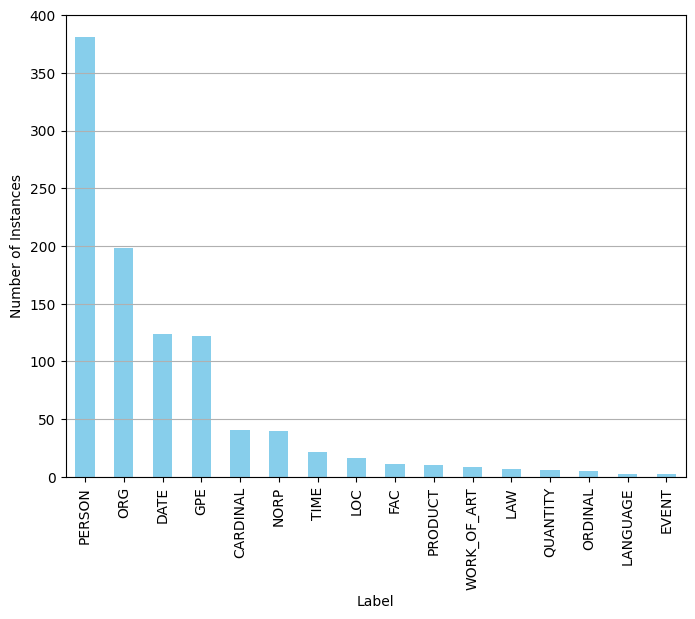

In [51]:
label_counts = entities_df['Label'].value_counts()

plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Label')
plt.ylabel('Number of Instances')
plt.grid(axis='y')
plt.show()